In [1]:
import os

dir_path = "/kaggle/input/intel-image-classification"

for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")    


There are 3 directories and 0 images in '/kaggle/input/intel-image-classification'.
There are 1 directories and 0 images in '/kaggle/input/intel-image-classification/seg_train'.
There are 6 directories and 0 images in '/kaggle/input/intel-image-classification/seg_train/seg_train'.
There are 0 directories and 2512 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/mountain'.
There are 0 directories and 2382 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/street'.
There are 0 directories and 2191 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/buildings'.
There are 0 directories and 2274 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/sea'.
There are 0 directories and 2271 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/forest'.
There are 0 directories and 2404 images in '/kaggle/input/intel-image-classification/seg_train/seg_train/glacier'.
There are 1 directories and 0 i

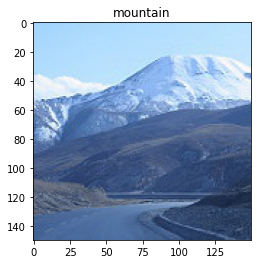

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

def show_random_images(path):
    random_class = random.choice(os.listdir(path))
    class_path = path + "/" + random_class
    random_img = random.choice(os.listdir(class_path))
    img_path = class_path + "/" + random_img
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(random_class)
    
show_random_images(dir_path+"/"+"seg_train/seg_train")

In [3]:
import tensorflow as tf

train_dir = dir_path + "/" + "seg_train/seg_train"
test_dir = dir_path + "/" + "seg_test/seg_test"
pred_dir = dir_path + "/" + "seg_pred/seg_pred"


BATCH_SIZE = 32
IMG_SIZE = (220, 220)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            label_mode="categorical",
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                           label_mode="categorical",
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)


Found 14034 files belonging to 6 classes.


2023-01-23 17:09:39.865537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 17:09:39.866456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 17:09:40.011404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 17:09:40.012214: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 17:09:40.013000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Found 3000 files belonging to 6 classes.


2023-01-23 17:09:43.647539: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


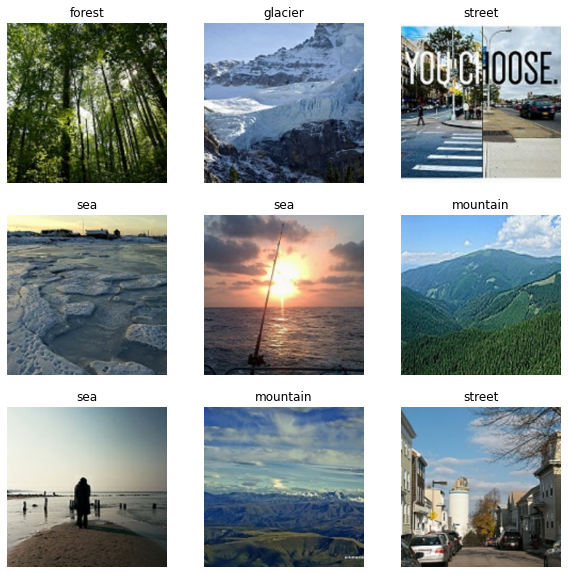

In [4]:
import numpy as np

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [5]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = -30

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(220, 220, 3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(6,activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Number of layers in the base model:  237
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 220, 220, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 4,057,257
Trainable params: 1,503,846
Non-trainable params: 2,553,411
_________________________________________________________________


In [6]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10


2023-01-23 17:09:54.693419: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


439/439 [==============================] - 63s 110ms/step - loss: 0.4116 - accuracy: 0.8623 - val_loss: 0.2117 - val_accuracy: 0.9277
Epoch 2/10
439/439 [==============================] - 38s 85ms/step - loss: 0.2108 - accuracy: 0.9270 - val_loss: 0.1888 - val_accuracy: 0.9317
Epoch 3/10
439/439 [==============================] - 38s 87ms/step - loss: 0.1731 - accuracy: 0.9387 - val_loss: 0.1800 - val_accuracy: 0.9313
Epoch 4/10
439/439 [==============================] - 38s 87ms/step - loss: 0.1469 - accuracy: 0.9487 - val_loss: 0.1740 - val_accuracy: 0.9373
Epoch 5/10
439/439 [==============================] - 38s 85ms/step - loss: 0.1254 - accuracy: 0.9570 - val_loss: 0.1747 - val_accuracy: 0.9370
Epoch 6/10
439/439 [==============================] - 38s 86ms/step - loss: 0.1077 - accuracy: 0.9612 - val_loss: 0.1771 - val_accuracy: 0.9407
Epoch 7/10
439/439 [==============================] - 38s 87ms/step - loss: 0.0858 - accuracy: 0.9711 - val_loss: 0.1835 - val_accuracy: 0.9387
Ep

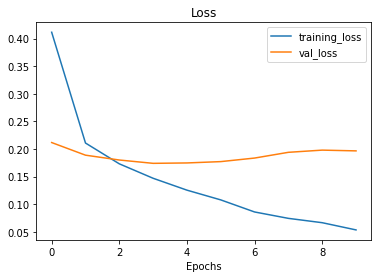

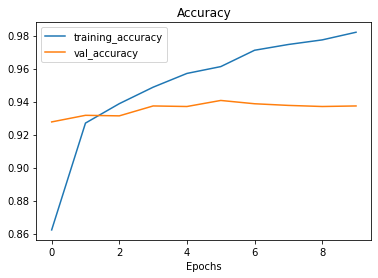

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

# loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [8]:
def show_random_prediction(model, path, class_names):
    random_img = random.choice(os.listdir(path))
    img_path = path + "/" + random_img
    in_img = mpimg.imread(img_path)
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [220, 220])

    pred = model.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[pred.argmax()] # if more than one output, take the max

    plt.imshow(in_img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

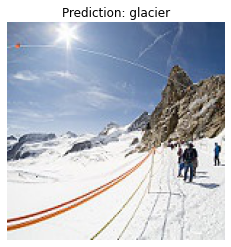

In [9]:
show_random_prediction(model, pred_dir, class_names)
